# Pima Indain Women Diabetes Datset Analysis

In [1]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.image as mpl

import io

df = pd.read_csv(r"C:\Users\eklas\OneDrive\Desktop\CSV\pidiabetes.csv")
pd.set_option('display.max_rows', 10)
df=df.rename(columns={'plasma_gluc':'glucose', '2hr_serum_insulin':'insulin', 
                      'dias_bp': 'bp','db_ped_fcn':'dpf', 'diab_yn':'diabetes',
                     'triceps_skinfold':'skinfold'})

data = df
diabetes = df
diabetes.head()

,preg,glucose,bp,skinfold,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# find 0 values in features where it would not make sense to have a 0 value (eg. 0 previous pregnancies is perfectly
# fine; insulin of 0 will mess up my results becasue it is not a viable option)

print((df[['glucose','bp', 'skinfold', 'insulin', 'bmi']] == 0).sum())

glucose       0
bp           35
skinfold    227
insulin     370
bmi          11
dtype: int64


In [3]:
import numpy as np

# mark zero values as missing or NaN in cols where 0 does not make sense
df[['glucose','bp', 'skinfold', 'insulin', 'bmi']] = df[['glucose','bp', 'skinfold', 'insulin', 'bmi']].replace(0, np.NaN)
# count the number of NaN values in each column
print(df.isnull().sum())
# wow, so lots of 0's in columns where a 0 result would not be physically possible. This could
# mess up my analysis if I leave them untouched. I will choose to remove them altoghether, 
# to simplify. Another alternative would be to impute them with the mean. 

preg          0
glucose       0
bp           35
skinfold    227
insulin     370
bmi          11
dpf           0
age           0
diabetes      0
dtype: int64


In [4]:
# drop cols with missing values as having 0's/missing vals will mess up our algorithms.

# drop rows with missing values
df_r = df
df_r.dropna(inplace=True)
# summarize the number of rows and columns in the dataset
print("Shape of the data, with 0's removed: ", df.shape)

Shape of the data, with 0's removed:  (392, 9)


In [6]:
df_r.describe()

,preg,glucose,bp,skinfold,insulin,bmi,dpf,age,diabetes
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# find nulls

nulls = df_r.isnull().sum()
nulls = nulls.sum()

# no nulls, 31 cols, great
print('\nThere are', df_r.shape[0],'rows in the dataset')
print('There are', df_r.shape[1],'columns (features) in the dataset')
print('There are {}'.format(nulls),'nulls in the dataset')


There are 392 rows in the dataset
There are 9 columns (features) in the dataset
There are 0 nulls in the dataset


In [6]:
# Percentage of diabetes/no diabetes participant in reduced dataset

count_no_diabetes = len(df_r[df_r['diabetes']==0])
count_diabetes = len(df_r[df_r['diabetes']==1])
pct_no_diabetes = count_no_diabetes/(count_no_diabetes+count_diabetes)*100
pct_of_diabetes = count_diabetes/(count_no_diabetes+count_diabetes)*100

print("No Diabetes: {:d},".format(count_no_diabetes), "or {:.1f}%".format(pct_no_diabetes))
print("Diabetes: {:d},".format(count_diabetes), "or {:.1f}%".format(pct_of_diabetes))

No Diabetes: 262, or 66.8%
Diabetes: 130, or 33.2%


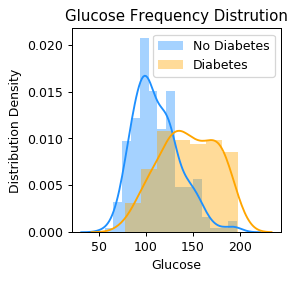

In [7]:
# Solution
import seaborn as sns

plt.subplots(figsize=(3,3), dpi=90)
ax1 = sns.distplot( df.loc[df_r.diabetes == 0, "glucose"] , color="dodgerblue", label="No Diabetes")
ax1 = sns.distplot( df.loc[df_r.diabetes == 1 , "glucose"] , color="orange", label="Diabetes")

# ax2 = sns.distplot( df.loc[df_r.diabetes == 0, "insulin"] , color="dodgerblue", label="No Diabetes")
# ax2 = sns.distplot( df.loc[df_r.diabetes == 1 , "insulin"] , color="orange", label="Diabetes")


plt.title('Glucose Frequency Distrution')
plt.ylabel("Distribution Density")
plt.xlabel("Glucose")
plt.legend();

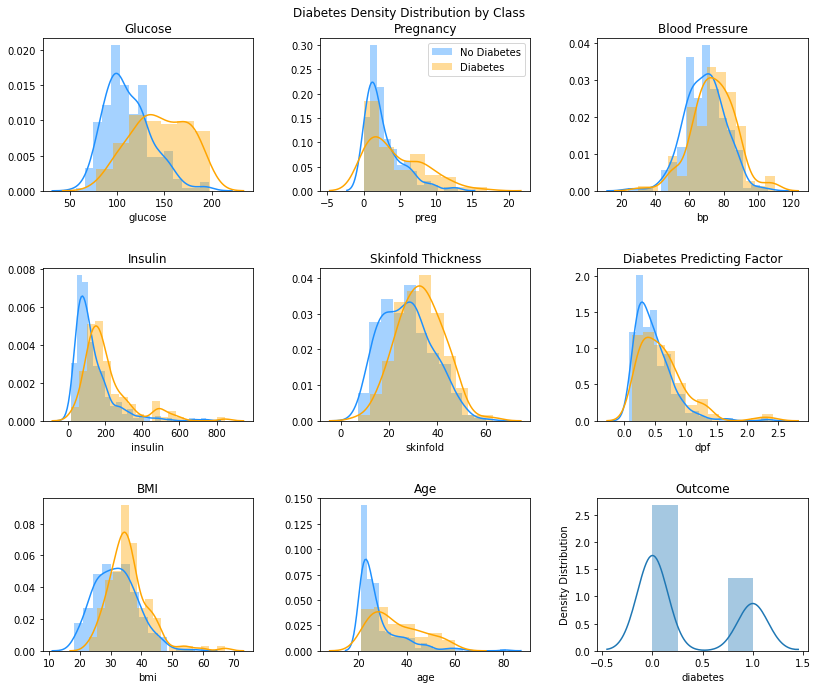

In [528]:
# Plot all the Distribution Densities

f, axes= plt.subplots(3, 3, figsize = (12,10), facecolor='white') 
f.suptitle('Diabetes Density Distribution by Class')

ax1 = sns.distplot( df.loc[df_r.diabetes == 0, "glucose"] , 
                   color="dodgerblue", label="No Diabetes", ax = axes[0,0])
ax1 = sns.distplot( df.loc[df_r.diabetes == 1 , "glucose"] , 
                   color="orange", label="Diabetes", ax = axes[0,0])
ax1.title.set_text('Glucose')
plt.ylabel("Density Distribution")


ax2 = sns.distplot( df.loc[df_r.diabetes == 0, "preg"] , 
                   color="dodgerblue", label="No Diabetes", ax = axes[0,1])
ax2 = sns.distplot( df.loc[df_r.diabetes == 1 , "preg"] , 
                   color="orange", label="Diabetes", ax = axes[0,1])
ax2.title.set_text('Pregnancy')
plt.ylabel("Density Distribution")



ax3 = sns.distplot( df.loc[df_r.diabetes == 0, "bp"] , 
                   color="dodgerblue", label="No Diabetes", ax = axes[0,2])
ax3 = sns.distplot( df.loc[df_r.diabetes == 1 , "bp"] , 
                   color="orange", label="Diabetes", ax = axes[0,2])
ax3.title.set_text('Blood Pressure')
plt.ylabel("Density Distribution")


ax4 = sns.distplot( df.loc[df_r.diabetes == 0, "insulin"] , 
                   color="dodgerblue", label="No Diabetes", ax = axes[1,0])
ax4 = sns.distplot( df.loc[df_r.diabetes == 1 , "insulin"] , 
                   color="orange", label="Diabetes", ax = axes[1,0])
ax4.title.set_text('Insulin')
plt.ylabel("Density Distribution")


ax5 = sns.distplot( df.loc[df_r.diabetes == 0, "skinfold"] , 
                   color="dodgerblue", label="No Diabetes", ax = axes[1,1])
ax5 = sns.distplot( df.loc[df_r.diabetes == 1 , "skinfold"] , 
                   color="orange", label="Diabetes", ax = axes[1,1])
ax5.title.set_text('Skinfold Thickness')
plt.ylabel("Density Distribution")


ax6 = sns.distplot( df.loc[df_r.diabetes == 0, "dpf"] , 
                   color="dodgerblue", label="No Diabetes", ax = axes[1,2])
ax6 = sns.distplot( df.loc[df_r.diabetes == 1 , "dpf"] , 
                   color="orange", label="Diabetes", ax = axes[1,2])
ax6.title.set_text('Diabetes Predicting Factor')
plt.xlabel("Diabetes Predicting Factor")
plt.ylabel("Density Distribution")


ax7 = sns.distplot( df.loc[df_r.diabetes == 0, "bmi"] , 
                   color="dodgerblue", label="No Diabetes", ax = axes[2,0])
ax7 = sns.distplot( df.loc[df_r.diabetes == 1 , "bmi"] , 
                   color="orange", label="Diabetes", ax = axes[2,0])
ax7.title.set_text('BMI')
plt.xlabel("BMI")
plt.ylabel("Density Distribution")


ax8 = sns.distplot( df.loc[df_r.diabetes == 0, "age"] , 
                   color="dodgerblue", label="No Diabetes", ax = axes[2,1])
ax8 = sns.distplot( df.loc[df_r.diabetes == 1 , "age"] , 
                   color="orange", label="Diabetes", ax = axes[2,1])
ax8.title.set_text('Age')
plt.xlabel("Age")

ax9 = sns.distplot(data['diabetes'])
ax9.title.set_text('Outcome')

plt.tight_layout(pad = 3.0)
plt.show()

# PCA Analysis: Diabetes

In [40]:
# scale, PCA analysis, then oversample for training dataset

from sklearn.decomposition import PCA # keep the first two principal components of the data 
from sklearn.preprocessing import StandardScaler
import numpy as np

# Separate input features and target
X = df_r.iloc[:,:-1].values
y = df_r.iloc[:,-1].values

# scale 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#########PCA

pca = PCA(n_components=3, svd_solver = 'full') # fit PCA model to diabetes data 
X_pca = pca.fit_transform(X_scaled)# transform data onto the first two principal components 

####
## Apply PCA
######
print("Original shape of dataset: {}".format(str(X.shape))) 
print("Reduced shape of the dataset: {}".format(str(X_pca.shape)))


# reduced training dataset down to 2 features

Original shape of dataset: (392, 8)
Reduced shape of the dataset: (392, 3)


In [183]:
pca = PCA(n_components=7,svd_solver='full')
X_pca = pca.fit_transform(X_scaled)

pca_exp_var_ratio = pca.explained_variance_ratio_

print("Explained variance for first two features: ", pca.explained_variance_)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])
print('Explained Variance using top features: ', pca_exp_var_ratio)

Explained variance for first two features:  [2.56606858 1.56076204 1.20182942 0.9581393  0.72201587 0.40244783
 0.31186933]
Original number of features: 8
Reduced number of features: 7
Explained Variance using top features:  [0.31994031 0.19459756 0.14984544 0.11946188 0.09002175 0.05017765
 0.03888422]


In [184]:
# Find the explained variance
import numpy as np

pca = PCA()
cumsum = np.cumsum(pca_exp_var_ratio) 
d = np.argmax(cumsum >= 0.95) + 1

print("Features required to >= 95% of the  dataset's variability: ", d)
# compute PCA without reducing dimensionality, then computes minumum number of dimensions required
# to preserve 95% of the training set's variance
# 2 feature accounts for greater than or equal to 95% of the training dataset's variabiltiy

Features required to >= 95% of the  dataset's variability:  7


Text(0.5, 1.0, '\nExplained Variance by Number of Dimensions using PCA\n')

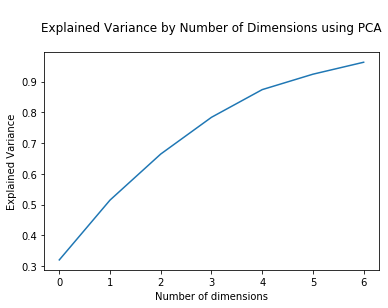

In [185]:
# Explained variance

plt.plot(cumsum)
plt.xlabel("Number of dimensions")
plt.ylabel("Explained Variance")
plt.title("\nExplained Variance by Number of Dimensions using PCA\n")

X_pca shape:  (392, 3)


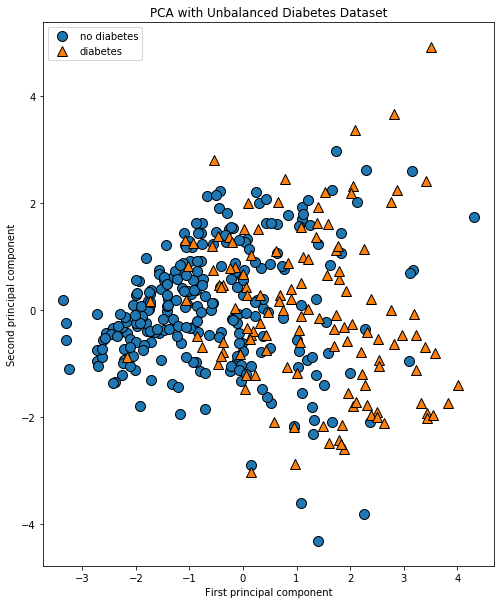

In [53]:
import numpy as np
import mglearn

# Scale, apply PCA first

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=3,svd_solver='full')
X_pca = pca.fit_transform(X_scaled)

# plot first vs. second principal component, colored by class 
plt.figure(figsize=(10, 10)) 
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], y) 
plt.legend(["no diabetes", "diabetes"],
           loc="best") 
plt.gca().set_aspect("equal") 
plt.title("PCA with Unbalanced Diabetes Dataset")
plt.xlabel("First principal component") 
plt.ylabel("Second principal component")
print("X_pca shape: ", X_pca.shape)
# can see that there's a bigger spread in the malignant, 1; more variation. Benign, 0, is more clustered.


## Oversampling to avoid underfitting due to minority positive class

In [54]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [55]:
# Total, I have 262 no-diabetes instances, but only 130 cases with diabetes. This makes my dataset
# quite unbalanced, leading to lopsided results. I will use an oversampling technique called SMOTE in order
# to synthetically generate more instances of the positive class in my training set.

cols = ['preg',	'glucose', 'bp', 'skinfold', 'insulin', 'bmi', 'dpf', 'age', 'diabetes']
df_r.columns = cols
print(df_r['diabetes'].value_counts())

0    262
1    130
Name: diabetes, dtype: int64


In [58]:
# # Because I have such an imbalanced dataset, with 33% in the positive class (have diabetes), I need to balance in order
# # to get meaningful results.

# # I will split into test and train sets BEFORE trying my oversampling techniques, otherwise this could lead to overfit
# # as the exact same samples may be present in both test and train data. 

# # I will create synthetic samples on my training set using imblearn's SMOTE, Synthetic Minority 
# # Oversampling Technique, which uses a nearest neighbors algorithm to generate new and synthetic
# # data we can use for training our model.

from imblearn.over_sampling import SMOTE 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.20)

sm = SMOTE(random_state=27, sampling_strategy = 1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('kNN', KNeighborsClassifier(n_neighbors = 5)))

# an overview of my 4 models, using scaled, PCA, and oversampled dataset but with default parameters:

results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits = 10)
    cv_results = cross_val_score(model, X_test, y_test, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(names)
    print("{}".format(name), "Cross-Val Accuracy Mean using SMOTE: {:.2f}%".format(cv_results.mean()*100), 
         "(SD = {:.2f}%)".format(cv_results.std()*100))

DT Cross-Val Accuracy Mean using SMOTE: 73.75% (SD = 17.18%)
NB Cross-Val Accuracy Mean using SMOTE: 83.75% (SD = 12.56%)
SVM Cross-Val Accuracy Mean using SMOTE: 85.00% (SD = 9.35%)
kNN Cross-Val Accuracy Mean using SMOTE: 81.25% (SD = 17.00%)


In [122]:
#############
# Steps: 1. Scale. 2. PCA. 3. Split. 4. Smote. 5. Specific Algorithm. 

from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=3,svd_solver='full')
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.20)

print("Before OverSampling, counts of Diabetes (label '1'): {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of No Diabetes (label '0'): {} \n".format(sum(y_train == 0))) 
  
# apply smote to train/test set

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of total train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of total train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of Diabetes Training (label '1'): {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of No Diabetes Training (label '0') : {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of Diabetes (label '1'): 105
Before OverSampling, counts of No Diabetes (label '0'): 208 

After OverSampling, the shape of total train_X: (416, 3)
After OverSampling, the shape of total train_y: (416,) 

After OverSampling, counts of Diabetes Training (label '1'): 208
After OverSampling, counts of No Diabetes Training (label '0') : 208


In [127]:
#############
####
### k-Nearest Neighbor
#### 
#############
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train_res, y_train_res.ravel())
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

predictions = knn.predict(X_test) 
  
# print classification report 
print("kNN with Balanced PCA dataset: \n",
      classification_report(y_test, predictions))

knn_pca_accuracy = accuracy_score(y_test, predictions)*100
print('kNN Accuracy with PCA and oversampling: ') 
print('%.2f' % knn_pca_accuracy + '%\n') #score


print('kNN PCA Confusion Matrix:')
print(confusion_matrix(y_test, predictions))

kNN with Balanced PCA dataset: 
               precision    recall  f1-score   support

           0       0.89      0.74      0.81        54
           1       0.59      0.80      0.68        25

    accuracy                           0.76        79
   macro avg       0.74      0.77      0.74        79
weighted avg       0.79      0.76      0.77        79

kNN Accuracy with PCA and oversampling: 
75.95%

kNN PCA Confusion Matrix:
[[40 14]
 [ 5 20]]


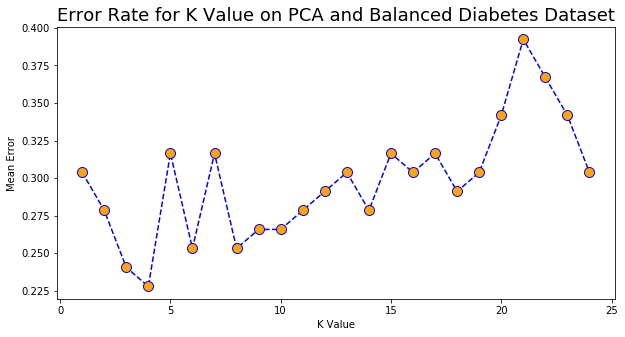

In [357]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))

plt.plot(range(1, 25), error, color='blue', linestyle='dashed', marker='o', 
         markerfacecolor='orange', markersize=10)
plt.title('Error Rate for K Value on PCA and Balanced Diabetes Dataset', size = 18)
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()
# n_neighbours = 4 is my best bet.

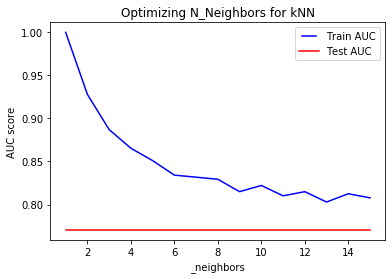

In [130]:
# find optimal n_neighbours for kNN
from sklearn.metrics import roc_curve, auc

neighbors = list(range(1,16))
train_results = []
test_results = []
for n in neighbors:
   model = KNeighborsClassifier(n_neighbors=n)
   model.fit(X_train_res, y_train_res)
   train_pred = model.predict(X_train_res)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_res, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred_fs = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(neighbors, train_results, 'b', label='Train AUC')
line2, = plt.plot(neighbors, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('_neighbors')
plt.title('Optimizing N_Neighbors for kNN')
plt.show()

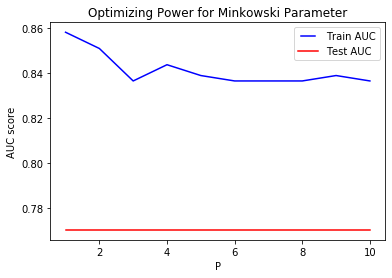

In [131]:
# find optimal p value for kNN to reduce overfit

distances = [1, 2, 3, 4, 5,6,7,8,9,10]
train_results = []
test_results = []
for p in distances:
   model = KNeighborsClassifier(p=p)
   model.fit(X_train_res, y_train_res)
   train_pred = model.predict(X_train_res)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_res, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred_fs = model.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(distances, train_results, 'b', label='Train AUC')
line2, = plt.plot(distances, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('P')
plt.title("Optimizing Power for Minkowski Parameter")
plt.show()
# default setting for p is fine for my data, as Test Auc does not seem to be responding. 

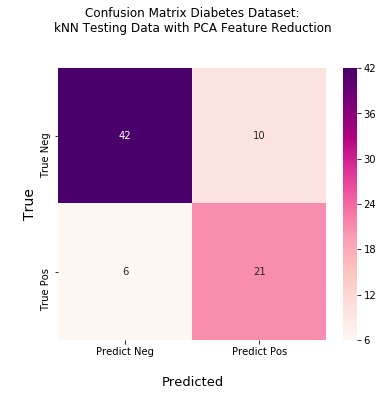

In [81]:
#Pretty Confusion Matrix for knn Testing Data

# X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_pca, y, test_size=0.20, random_state=1)

import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6,5))
cm_knn = confusion_matrix(y_test, knn.predict
                          (X_test))
sns.heatmap(cm_knn,annot=True, cmap="RdPu", fmt="d", 
            xticklabels = ['Predict Neg', 'Predict Pos'], 
            yticklabels = ['True Neg', 'True Pos'])
plt.xlabel('\nPredicted', size=13)
plt.ylabel('\nTrue', size=14)
plt.title("Confusion Matrix Diabetes Dataset:\nkNN Testing Data with PCA Feature Reduction\n\n")
plt.show()

# SVM for Diabetes Dataset

In [82]:
# kernel for high dimensional feature space

from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 3, kernel="rbf",	gamma=0.04) 
X_reduced = rbf_pca.fit_transform(X_pca)

In [89]:
##############################################################################################
#Split-out dataset
##############################################################################################
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# kernel for high dimensional feature space

from sklearn.decomposition import KernelPCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=3,svd_solver='full')
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.20)

# Apply model to oversampled training dataset

from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

svm = SVC(C = 100, gamma = 0.001,
                kernel = 'rbf') #{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
svm.fit(X_train_res, y_train_res.ravel())

print('--------------- SVM on Balanced PCA dataset : classifier.fit [Done]')

y_pred = svm.predict(X_test)

print('--------------- SVM : classifier.predict [Done]')

from sklearn.metrics import classification_report, confusion_matrix
print ("----------------------> [SVM]\n")

svm_score = svm.score(X_test, y_test)*100
from sklearn.model_selection import cross_val_score
print('SVM accuracy, with PCA: {:.2f}%'.format(svm_score))

print('\nSVM with Balanced PCA dataset Confusion Matrix\n')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

--------------- SVM on Balanced PCA dataset : classifier.fit [Done]
--------------- SVM : classifier.predict [Done]
----------------------> [SVM]

SVM accuracy, with PCA: 81.01%

SVM with Balanced PCA dataset Confusion Matrix

[[41 11]
 [ 4 23]]
              precision    recall  f1-score   support

           0       0.91      0.79      0.85        52
           1       0.68      0.85      0.75        27

    accuracy                           0.81        79
   macro avg       0.79      0.82      0.80        79
weighted avg       0.83      0.81      0.81        79



In [371]:
# Tune my SVM model

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=None)

# Set the parameters by cross-validation, 
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
                   {'kernel': ['poly'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train_res, y_train_res)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision



C:\Users\eklas\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\eklas\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best parameters set found on development set:

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.689 (+/-0.068) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.516 (+/-0.449) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.715 (+/-0.071) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.689 (+/-0.062) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.727 (+/-0.085) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.709 (+/-0.079) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.708 (+/-0.061) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.701 (+/-0.062) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.704 (+/-0.063) for {'C': 1, 'kernel': 'linear'}
0.704 (+/-0.063) for {'C': 10, 'kernel': 'linear'}
0.704 (+/-0.063) for {'C': 100, 'kernel': 'linear'}
0.704 (+/-0.063) for {'C': 1000, 'kernel': 'linear'}
0.674 (+/-0.098) for {'C': 1, 'kernel': 'poly'}
0.672 (+/-0.112) for {'C': 10, 'kernel': 'poly'}
0.672 (+/-0.112) for {'C': 100, 'kernel': 'poly'}
0.

SVM accuracy score: 81.01 
SVM AUC score: 82.02%
SVM ROC score: 82.02%


Text(0.5, 0, 'False Positive Rate')

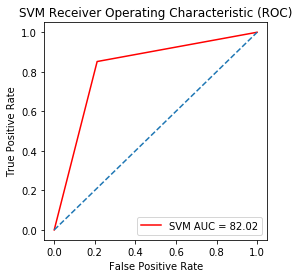

In [90]:
# building a ROC curve for SVM
# start with AUC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics


svm_score = svm.score(X_test, y_test)*100
print("SVM accuracy score: {:.2f} ".format(svm_score))

svm_auc_roc = metrics.roc_auc_score(y_test, y_pred)*100

print('SVM AUC score: {:.2f}%'.format(svm_auc_roc))


false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
svm_roc_auc = auc(false_positive_rate, true_positive_rate)*100
print('SVM ROC score: {:.2f}%'.format(svm_roc_auc))

import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.title('SVM Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate,true_positive_rate, 
         color='red',label = 'SVM AUC = %0.2f' % svm_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [91]:
# Gaussian Naive Bayes Baybeeeeee
# used becasue we're assuming our features follow a normal distribution, and can contain decimal vals.

##############################################################################################
# Split-out dataset
##############################################################################################

##################################### [GaussianNB]
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=3,svd_solver='full')
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.20)

# Apply model to oversampled training dataset

from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

print('--------------- Split-out dataset [Done]')

classifier = GaussianNB()
classifier.fit(X_train_res, y_train_res.ravel())

print('--------------- GaussianNB : classifier.fit [Done]')

y_pred_nb = classifier.predict(X_test)

print('--------------- GaussianNB : classifier.predict [Done]')

from sklearn.metrics import classification_report, confusion_matrix

print ("\n----------------------> [GaussianNB]\n\n Gaussian Confusion Matrix on PCA dataset:\n")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

from sklearn.metrics import accuracy_score

classifier.fit(X_train_res, y_train_res)

gaussianNB_accur = accuracy_score(y_test, y_pred_nb, normalize = True)*100 #normalized 
print('Naive Bayes Gaussian Testing accuracy for PCA dataset: %.2f' %+ gaussianNB_accur + '%')

--------------- Split-out dataset [Done]
--------------- GaussianNB : classifier.fit [Done]
--------------- GaussianNB : classifier.predict [Done]

----------------------> [GaussianNB]

 Gaussian Confusion Matrix on PCA dataset:

[[40  9]
 [ 6 24]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84        49
           1       0.73      0.80      0.76        30

    accuracy                           0.81        79
   macro avg       0.80      0.81      0.80        79
weighted avg       0.82      0.81      0.81        79

Naive Bayes Gaussian Testing accuracy for PCA dataset: 81.01%


In [92]:
X_pca.shape

(392, 3)

# Decisoin Tree Classifier

In [93]:
# Next up: decision tree classifier
# I'm using GridSearchCV to find best parameters. 

##################################### [DecisionTreeClassifier]
from sklearn.tree import DecisionTreeClassifier
import random
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=3,svd_solver='full')
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.20)

# Apply model to oversampled training dataset

from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

print('--------------- Split-out dataset [Done]')

classifier_dt_pca = DecisionTreeClassifier()
classifier_dt_pca.fit(X_train_res, y_train_res.ravel())

print('--------------- DecisionTreeClassifier : classifier.fit [Done]')

y_pred_dt = classifier_dt_pca.predict(X_test)

print('--------------- DecisionTreeClassifier : classifier.predict [Done]')


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from time import time
from scipy.stats import randint

# use feature importance 
feature_fi = diabetes
                 
X_fi = X_pca
y_fi = y

#build a classifier
clf_fi = DecisionTreeClassifier()


# Utility function to report best scores
def report(result, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(result['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.2f}% (std: {1:.3f})"
                  .format(result['mean_test_score'][candidate]*100,
                          result['std_test_score'][candidate]))
            print("Parameters: {0}".format(result['params'][candidate]))
            print("")


#specify parameters and distributions to sample from 
param_dist = {"max_depth": [2, 10], # I set a limit of 10 for max depth, otherwise all models would select None 
              "random_state": randint(0,100),
              "min_samples_split": randint(2,10),
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]} 
#run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(clf_fi, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv = 10) # 10x cross-validation

start = time()
random_search.fit(X_fi, y_fi)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)


--------------- Split-out dataset [Done]
--------------- DecisionTreeClassifier : classifier.fit [Done]
--------------- DecisionTreeClassifier : classifier.predict [Done]
RandomizedSearchCV took 2.10 seconds for 50 candidates parameter settings.
Model with rank: 1
Mean validation score: 77.04% (std: 0.047)
Parameters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 5, 'random_state': 22}

Model with rank: 1
Mean validation score: 77.04% (std: 0.047)
Parameters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 7, 'random_state': 65}

Model with rank: 1
Mean validation score: 77.04% (std: 0.047)
Parameters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 9, 'random_state': 21}

Model with rank: 1
Mean validation score: 77.04% (std: 0.047)
Parameters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 6, 'min_samples_split': 2, 'random_state': 85}

Model with rank: 1
Mea

In [150]:
# to find the optimal alpha number, I am going to do some more pruning.

print(__doc__)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=0)
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train_res, y_train_res)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Automatically created module for IPython interactive environment


In [151]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_res, y_train_res)
    clfs.append(clf)
print("Number of nodes in the Last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the Last tree is: 1 with ccp_alpha: 0.12558918382535356


Text(0.5, 1.0, 'Total Impurity vs Effective Alpha for Training Set')

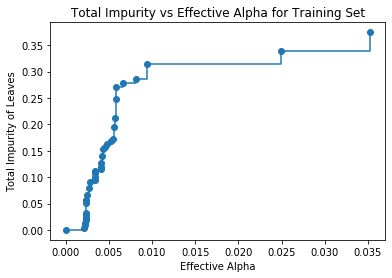

In [152]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("Effective Alpha")
ax.set_ylabel("Total Impurity of Leaves")
ax.set_title("Total Impurity vs Effective Alpha for Training Set")

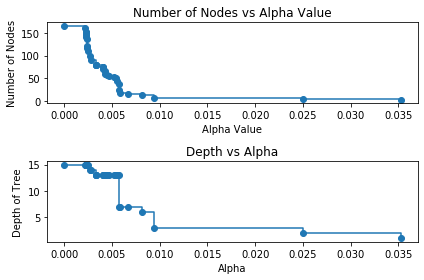

In [153]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("Alpha Value")
ax[0].set_ylabel("Number of Nodes")
ax[0].set_title("Number of Nodes vs Alpha Value")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of Tree")
ax[1].set_title("Depth vs Alpha")
fig.tight_layout()

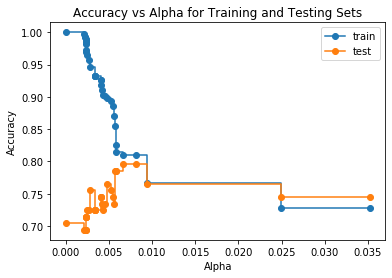

In [154]:
train_scores = [clf.score(X_train_res, y_train_res) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Alpha for Training and Testing Sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

# when ccp_alpha is left to default 0, it leads to overfitting, as seen in the 100% accuracy. 
# Around 0.9 is the sweet spot value of Alpha where testing accuracy is highest. 

In [155]:
from sklearn import tree

from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

print('--------------- Split-out dataset [Done]')

dt_clf_pca = tree.DecisionTreeClassifier(ccp_alpha=0.8, criterion = 'gini', 
                                         max_depth = 2, min_samples_leaf = 4,
                                 random_state = 99, min_samples_split = 5)

dt_clf_pca.fit(X_train_res, y_train_res.ravel())
dt_clf_pca

--------------- Split-out dataset [Done]


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [161]:
# Training Dataset

from sklearn import metrics
def measure_perf(X_pca, y, dt_clf_pca, show_accuracy=True,
                show_classification_report=True, show_confusion_matrix=True):
    y_pred_dt = dt_clf_pca.predict(X_test)
    if show_accuracy:
        print('Training Data Decision Tree Accuracy with PCA dataset: {0:.2f}% '.format(
                metrics.accuracy_score(y_test, y_pred_dt)*100
                ),"\n")
        if show_classification_report:
            print("Classification report")
            print(metrics.classification_report(y_test, y_pred_dt), "\n")
        if show_confusion_matrix:
            print("Confusion Matrix\nDecision Tree with PCA Training dataset : \n")
            print(metrics.confusion_matrix(y_test, y_pred_dt),"\n")
# measure performance

measure_perf(X_train_res, y_train_res, dt_clf_pca, 
            show_classification_report = True, show_confusion_matrix = True)

#wow, decision tree with some pruning is quite accurate, 98.5%. Probably I'm overfitting...?

Training Data Decision Tree Accuracy with PCA dataset: 74.49%  

Classification report
              precision    recall  f1-score   support

           0       0.98      0.63      0.77        65
           1       0.57      0.97      0.72        33

    accuracy                           0.74        98
   macro avg       0.77      0.80      0.74        98
weighted avg       0.84      0.74      0.75        98
 

Confusion Matrix
Decision Tree with PCA Training dataset : 

[[41 24]
 [ 1 32]] 



In [169]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state = 2) 


from sklearn import tree
dt_test_pca = tree.DecisionTreeClassifier(ccp_alpha=0.8, criterion = 'gini', 
                                         max_depth = 2, min_samples_leaf = 4,
                                 random_state = 99, min_samples_split = 5)
# Fit the model, see the params
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

dt_test_pca = dt_test_pca.fit(X_test, y_test)
dt_test_pca

# Testing Dataset

from sklearn import metrics
def measure_perf(X_pca, y, dt_test_pca, show_accuracy=True,
                show_classification_report=True, show_confusion_matrix=True):
    y_pred_dt = dt_test_pca.predict(X_pca)
    if show_accuracy:
        print('Testing Data Decision Tree Accuracy with PCA dataset: {0:.2f}% '.format(
                metrics.accuracy_score(y_test, y_pred_dt)*100
                ),"\n")
        if show_classification_report:
            print("Classification report")
            print(metrics.classification_report(y_test, y_pred_dt), "\n")
        if show_confusion_matrix:
            print("Confusion Matrix\nDecision Tree with PCA Testing dataset : \n")
            print(metrics.confusion_matrix(y_test, y_pred_dt),"\n")
# measure performance

measure_perf(X_test, y_test, dt_test_pca, 
            show_classification_report = True, show_confusion_matrix = True)

Testing Data Decision Tree Accuracy with PCA dataset: 82.65%  

Classification report
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        65
           1       0.77      0.70      0.73        33

    accuracy                           0.83        98
   macro avg       0.81      0.79      0.80        98
weighted avg       0.82      0.83      0.82        98
 

Confusion Matrix
Decision Tree with PCA Testing dataset : 

[[58  7]
 [10 23]] 



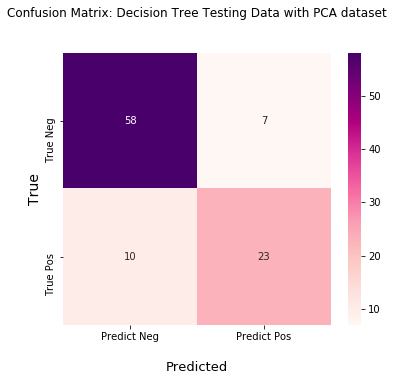

In [170]:
#Pretty Confusion Matrix for Testing Data

# X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_pca, y, test_size=0.20, random_state=1)

import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6,5))
cm_dt = confusion_matrix(y_test,
                         dt_test_pca.predict(X_test))
sns.heatmap(cm_dt,annot=True, cmap="RdPu", fmt="d", 
            xticklabels = ['Predict Neg', 'Predict Pos'], 
            yticklabels = ['True Neg', 'True Pos'])
plt.xlabel('\nPredicted', size=13)
plt.ylabel('\nTrue', size=14)
plt.title("Confusion Matrix: Decision Tree Testing Data with PCA dataset\n\n")
plt.show()

X_pca:  392
y:  392
y_train_res:  410
X_train_res :  410
y_test:  79
X_test_pca:  79  



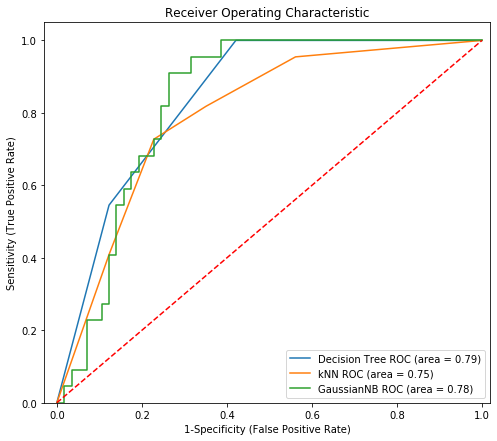

In [175]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=3,svd_solver='full')
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.20)

# Apply model to oversampled training dataset

from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

print("X_pca: ", len(X_pca))
print("y: ", len(y))
print("y_train_res: ", len(y_train_res))
print("X_train_res : ", len(X_train_res))
print("y_test: ", len(y_test))
print("X_test_pca: ", len(X_test), " \n")


plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [

{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(ccp_alpha=0.8, criterion = 'gini', 
                                         max_depth = 2, min_samples_leaf = 4,
                                 random_state = 99, min_samples_split = 5)
}, 
{
    'label': 'kNN',
    'model': KNeighborsClassifier(n_neighbors = 4),
},    
{
    'label': 'GaussianNB',
    'model': GaussianNB(),
},  
]

# Below for loop iterates through my models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train_res, y_train_res) # train the model
    y_pred_pca = model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test, model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.03, 1.02])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
fig = plt.gcf()
fig.savefig('ROC_combos.png', dpi=100)
fig.set_size_inches(8, 7, forward=True)
plt.show()

# k-Means Clustering

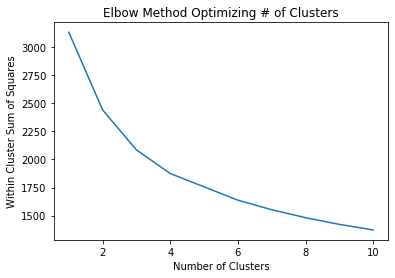

In [100]:
# Elbow method for finding ideal number of k
# wcss, within-cluster sum of squares

#Find the sum of square distances of each data point 
# from centroid of the cluster, also called as within cluster sum of squares

# Assign X and y
diabetes = df
X_diabetes = data.drop('diabetes', axis = 1) #all vars, not including diabetes y/n
y = data['diabetes'] #binary: diabetes no (0) or yes (1)

scaler = StandardScaler()
scaler.fit(X_diabetes)
X_diabetes = scaler.transform(X_diabetes)

wcss_diabetes=[]

for i in range(1,11):
    kmeans_diabetes = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    y_kmeans_diabetes = kmeans_diabetes.fit(X_diabetes)
    wcss_diabetes.append(y_kmeans_diabetes.inertia_)

# Plot
plt.plot(range(1,11), wcss_diabetes)
plt.title("Elbow Method Optimizing # of Clusters")
plt.ylabel("Within Cluster Sum of Squares")
plt.xlabel("Number of Clusters")
plt.show()

# the location of the huge bend is considered the optimal # for k, so in my case there's a
# steep dropoff at 2 in my sum of squares, so 2 is probably the best number of clusters. 

In [111]:
# Now to visualize, using k-means++ to maximise the distance between the centroids' initial starting place

X_diabetes = data.drop('diabetes', axis = 1) #all vars, not including diabetes y/n

scaler = StandardScaler()
scaler.fit(X_diabetes)
X_diabetes = scaler.transform(X_diabetes)

wcss_diabetes=[]
for i in range(1,11):
    kmeans_diabetes = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    y_means_diabetes = kmeans_diabetes.fit(X_diabetes)
    wcss_diabetes.append(y_means_diabetes.inertia_)

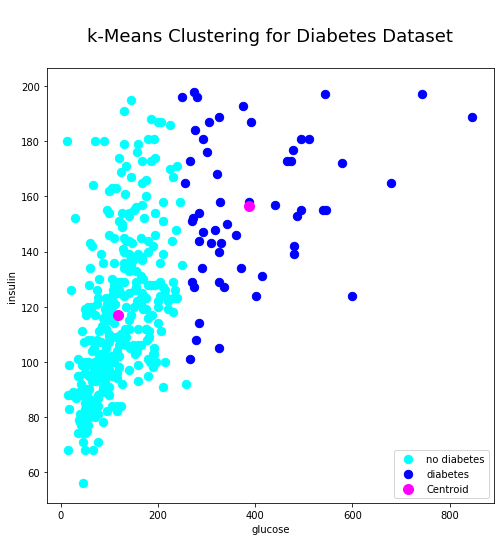

In [121]:
import numpy

kmeans_diabetes = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
y_kmeans_diabetes = kmeans_diabetes.fit_predict(X_diabetes)

# plot clusters of glucose and insulin

plt.figure(figsize=(8,8))
plt.scatter(X_diabetes.iloc[y_kmeans_diabetes == 0,4], X_diabetes.iloc[y_kmeans_diabetes == 0,1], s= 70, color = 'cyan', label ='no diabetes')
plt.scatter(X_diabetes.iloc[y_kmeans_diabetes == 1,4], X_diabetes.iloc[y_kmeans_diabetes == 1,1], s= 70, color = 'blue', label ='diabetes')

plt.scatter(kmeans_diabetes.cluster_centers_[:,4], kmeans_diabetes.cluster_centers_[:, 1], s= 100, color = 'magenta', label ='Centroid')
plt.title('\nk-Means Clustering for Diabetes Dataset\n', size = 18)
plt.xlabel('glucose')
plt.ylabel('insulin')
plt.legend()
plt.show()